In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
import re
from wordcloud import WordCloud

### Import Data

In [5]:
df_train = pd.read_csv("./data/train.csv")
df_train.shape

(891, 12)

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check Missing Value

In [7]:
missing_value = df_train.isna().sum().sort_values(ascending=False)

pd.DataFrame({"columns" : missing_value.index,
              "total_na" : missing_value.values,
              "percentage" : np.round(missing_value.values/ len(df_train) * 100,2)})

,columns,total_na,percentage
0,Cabin,687,77.10
1,Age,177,19.87
2,Embarked,2,0.22
3,PassengerId,0,0.00
4,Survived,0,0.00
5,Pclass,0,0.00
6,Name,0,0.00
7,Sex,0,0.00
8,SibSp,0,0.00
9,Parch,0,0.00


### **Target Feature**

*How proportion of Survived and Not Survived passenger?*

In [8]:
sns.set_theme(style='darkgrid')
sns.set(font_scale=0.8)

In [43]:
def annotate_x(ax, percentage=True, size=10):
    total = sum([p.get_height() for p in ax.patches])
    
    for p in ax.patches:
        if percentage == True:
            label = f'{int(p.get_height())}\n({(100 * p.get_height() / total) :.1f}%)'
        else:
            label = f'{p.get_height()}'
        ax.annotate(label, (p.get_x() + p.get_width() / 2, p.get_height()), size=size, ha='center', va='bottom')

In [44]:
def annotate_x_group(ax, percentage=True, size=10):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = [xgroup[i] for xgroup in all_heights]
            total = sum([x for x in total if not np.isnan(x)])
            if percentage == True:
                label = f'{p.get_height()}\n({(100 * p.get_height() / total) :.1f}%)'
            else:
                label = f'{p.get_height()}'    
            ax.annotate(label, (p.get_x() + p.get_width() / 2, p.get_height()), size=size, ha='center', va='bottom')

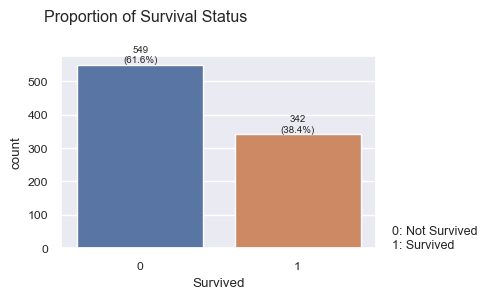

In [47]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x='Survived', data=df_train)
annotate_x(ax, percentage=True, size=7)

plt.text(1.6, 0,"0: Not Survived\n1: Survived ", fontsize=9)

plt.suptitle("Proportion of Survival Status", x=0.3)
plt.tight_layout()
plt.show()

### **Categorical Feature**

*What is the proportion of sex based on Survival Status?*

In [52]:
def categorical_plot(column, size1=10, size2=10):
    plt.subplot(121)
    ax = sns.countplot(x=column, data=df_train, palette = "coolwarm")
    annotate_x(ax, percentage=True, size=size1)

    plt.subplot(122)
    ax2 = sns.countplot(x=column, hue='Survived', data=df_train)
    annotate_x_group(ax2, percentage=True, size=size2)
    ax2.legend(['Not Survived', 'Survived'], loc='upper right')

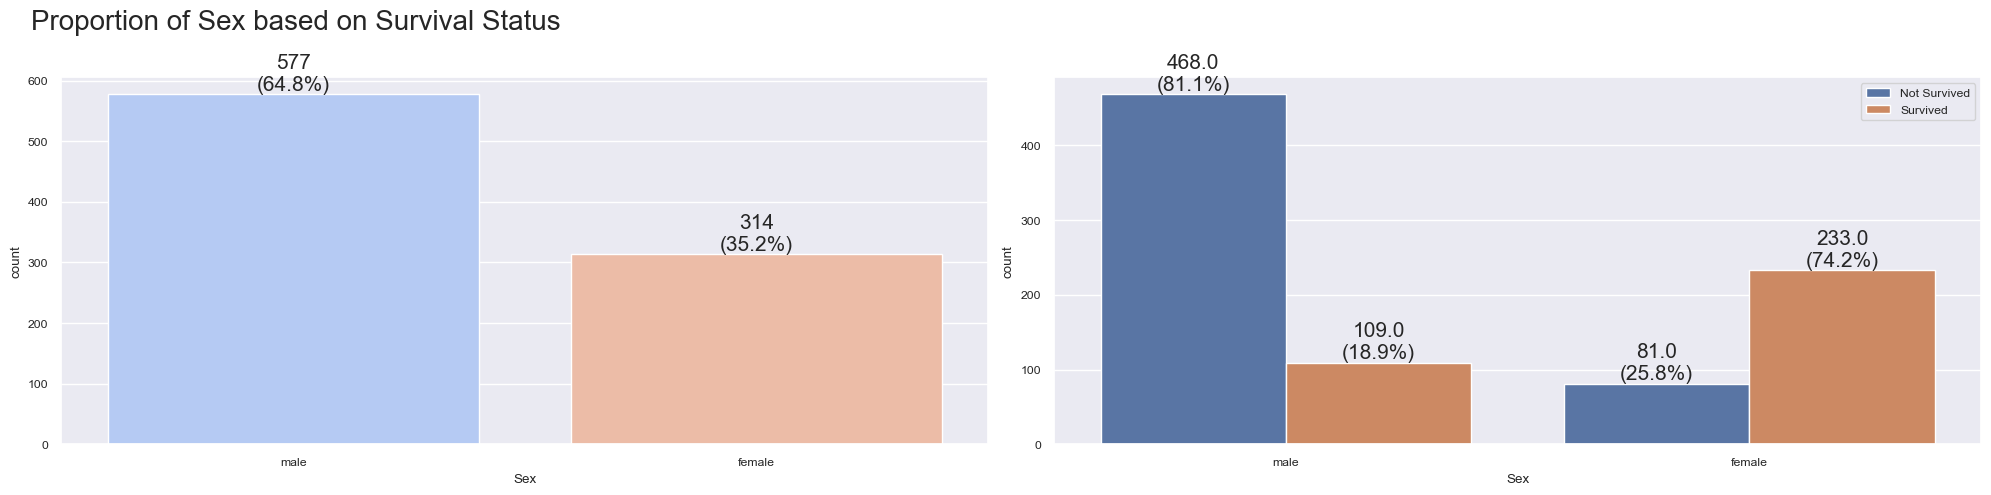

In [58]:
plt.figure(figsize=(20,5))

categorical_plot('Sex', size1= 15, size2=15)

plt.suptitle("Proportion of Sex based on Survival Status", x=0.15, size=20)
plt.tight_layout()
plt.show()

*What is the proportion of Sibsp (Number of Siblings or Spouses) based on Survival Status?*

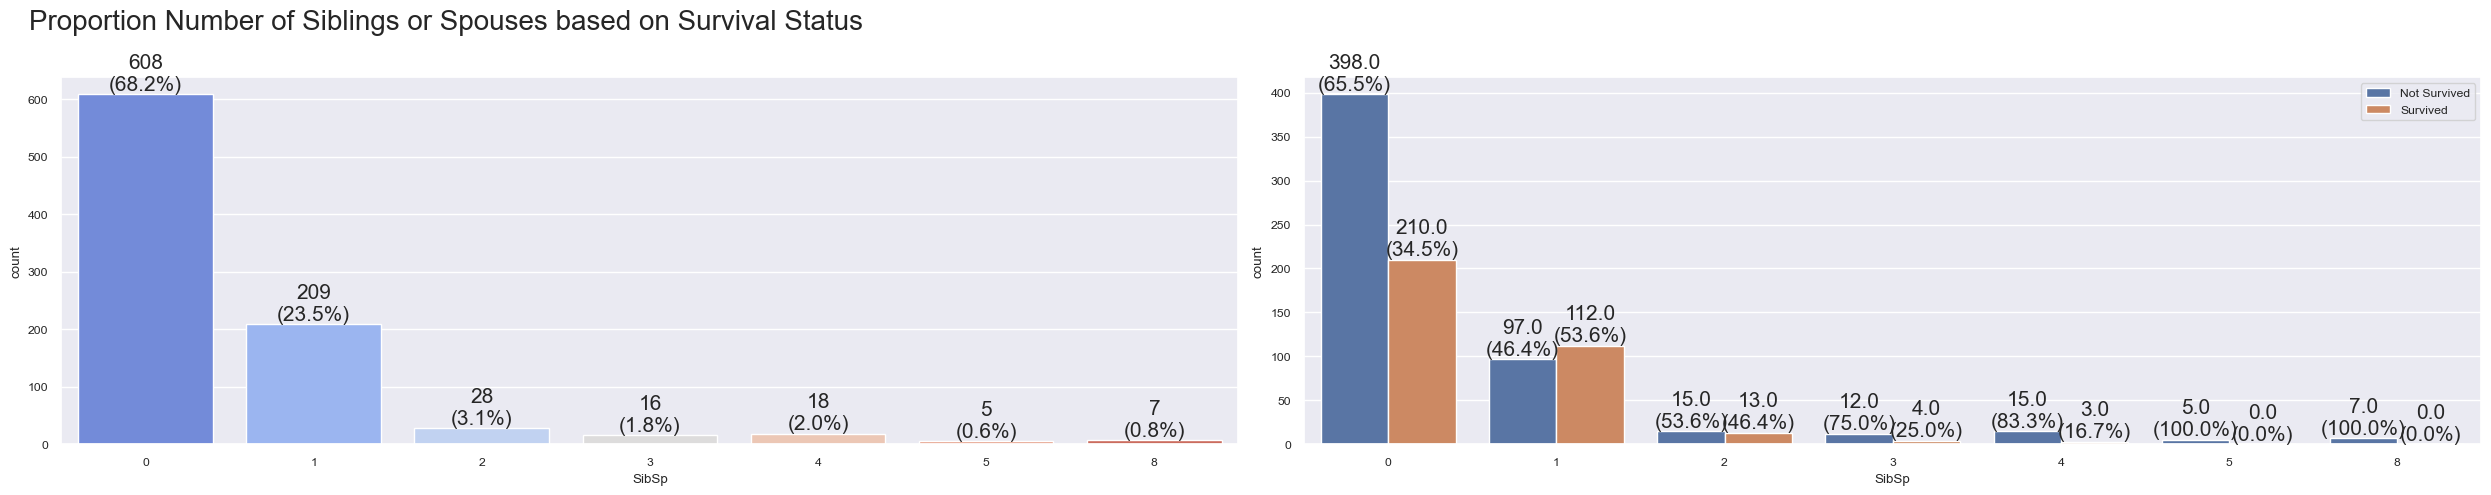

In [71]:
plt.figure(figsize=(25, 5))

categorical_plot('SibSp', size1= 15, size2=15)

plt.suptitle("Proportion Number of Siblings or Spouses based on Survival Status", x=0.18, size=20)
plt.tight_layout()
plt.show()

*What is the proportion of Parch (Number of Parent or Childrens) based on Survival Status?*

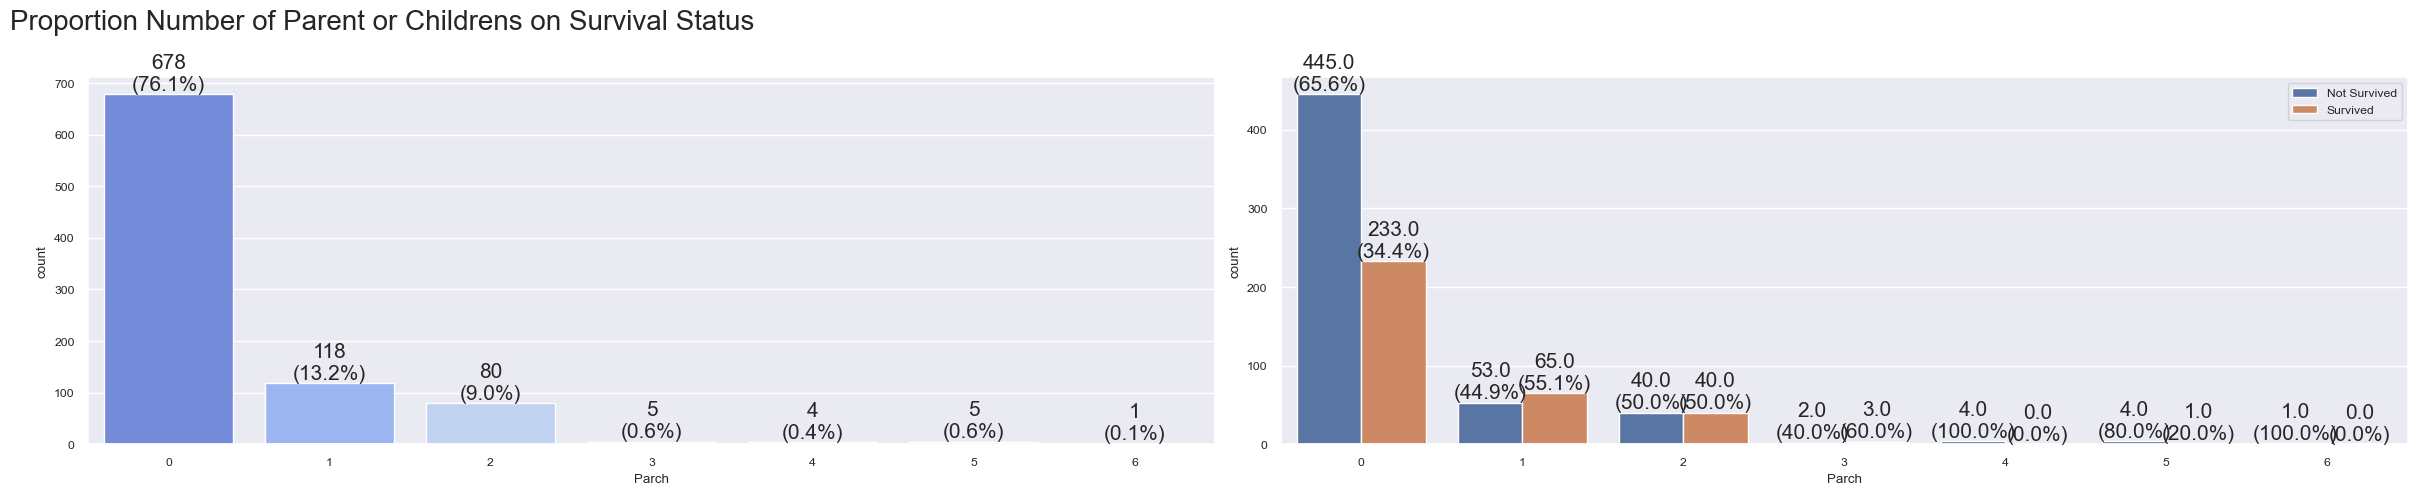

In [69]:
plt.figure(figsize=(24,5))

categorical_plot('Parch', size1= 15, size2=15)

plt.suptitle("Proportion Number of Parent or Childrens on Survival Status", x=0.15, size=20)
plt.tight_layout()
plt.show()

*What is the proportion of Embarked (Port of Embarkation) based on Survival Status?*

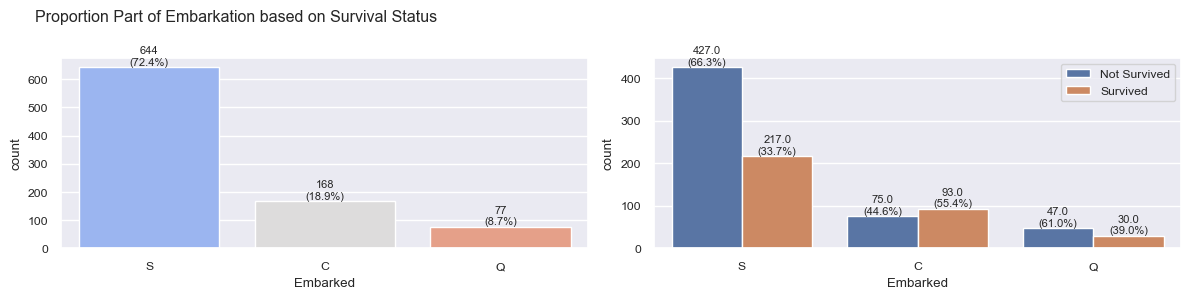

In [76]:
plt.figure(figsize=(12,3))

categorical_plot('Embarked', size1=8, size2=8)

plt.suptitle("Proportion Part of Embarkation based on Survival Status", x=0.2)
plt.tight_layout()
plt.show()

### **Ordinal Feature**

*What is the proportion of Pclass (Ticket class) based on Survival Status?*

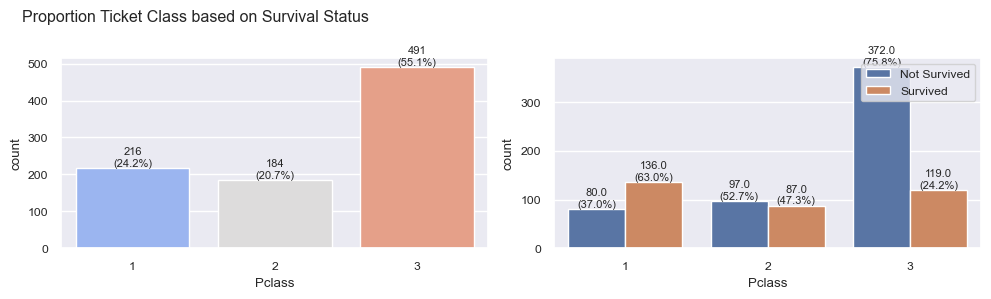

In [77]:
plt.figure(figsize=(10,3))

categorical_plot('Pclass', size1=8, size2=8)

plt.suptitle("Proportion Ticket Class based on Survival Status", x=0.2)
plt.tight_layout()
plt.show()

### **Numerical Feature**

In [78]:
# Statistic Description

df_train[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


*What is the distribution of Age based on Survival Status?*

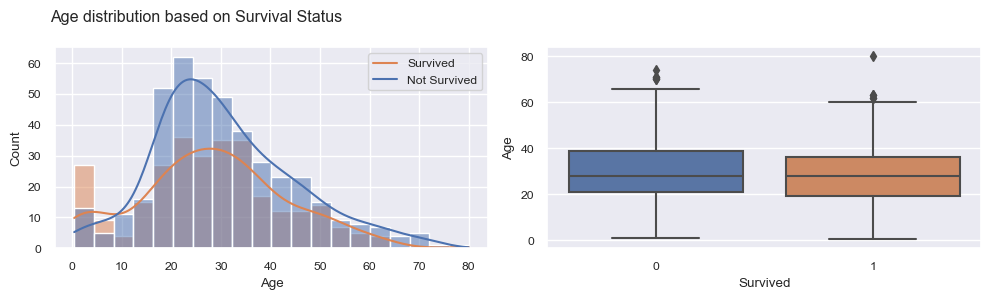

In [79]:
plt.figure(figsize=(10,3))

plt.subplot(121)
ax = sns.histplot(data=df_train, x='Age', hue='Survived', kde=True, legend=False)
ax.legend(labels=['Survived', 'Not Survived'], loc='upper right')

plt.subplot(122)
ax2 = sns.boxplot(x='Survived', y='Age', data=df_train)

plt.suptitle("Age distribution based on Survival Status", x=0.2)
plt.tight_layout()
plt.show()

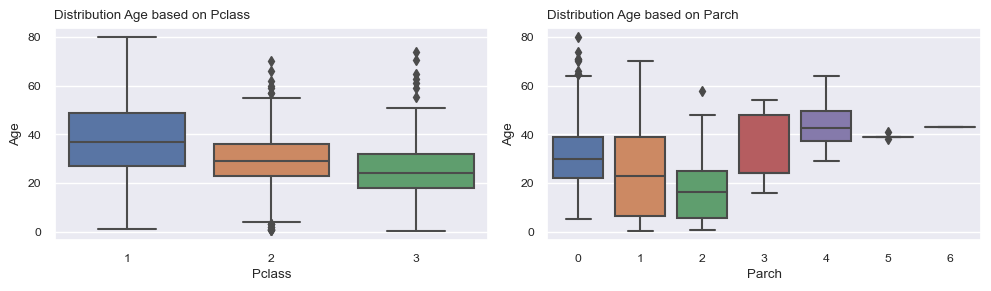

In [80]:
plt.figure(figsize=(10,3))

plt.subplot(121)
ax1 = sns.boxplot(x='Pclass', y='Age', data=df_train)
ax1.set_title("Distribution Age based on Pclass", loc='left')

plt.subplot(122)
ax2 = sns.boxplot(x='Parch', y='Age', data=df_train)
ax2.set_title("Distribution Age based on Parch", loc='left')

plt.tight_layout()
plt.show()

*What is the distribution of Fare based on Survival Status?*

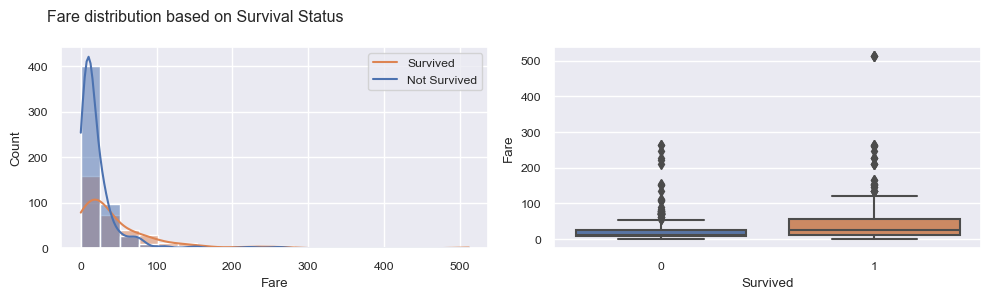

In [81]:
plt.figure(figsize=(10,3))

plt.subplot(121)
ax = sns.histplot(data=df_train, bins=20, x='Fare', hue='Survived', kde=True, legend=False)
ax.legend(labels=['Survived', 'Not Survived'], loc='upper right')

plt.subplot(122)
ax2 = sns.boxplot(x='Survived', y='Fare', data=df_train)

plt.suptitle("Fare distribution based on Survival Status", x=0.2)
plt.tight_layout()
plt.show()

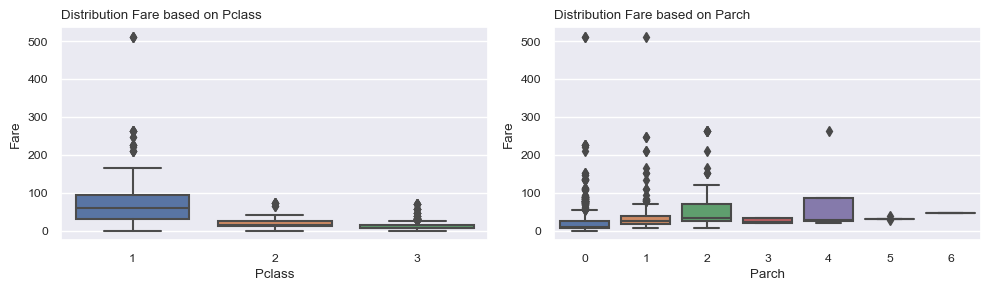

In [82]:
plt.figure(figsize=(10,3))

plt.subplot(121)
ax1 = sns.boxplot(x='Pclass', y='Fare', data=df_train)
ax1.set_title("Distribution Fare based on Pclass", loc='left')

plt.subplot(122)
ax2 = sns.boxplot(x='Parch', y='Fare', data=df_train)
ax2.set_title("Distribution Fare based on Parch", loc='left')

plt.tight_layout()
plt.show()

### Correlation Categorical vs Target

In [83]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

In [84]:
cat_cols = ['Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass', 'Survived']

result = {}
for cat1 in cat_cols:
    result[cat1] = []
    for cat2 in cat_cols:
        contingency_table = pd.crosstab(df_train[cat1], df_train[cat2])
        cramer_v = cramers_v(contingency_table.values)
        result[cat1].append(cramer_v)

cat_corr = pd.DataFrame(result, index=cat_cols)

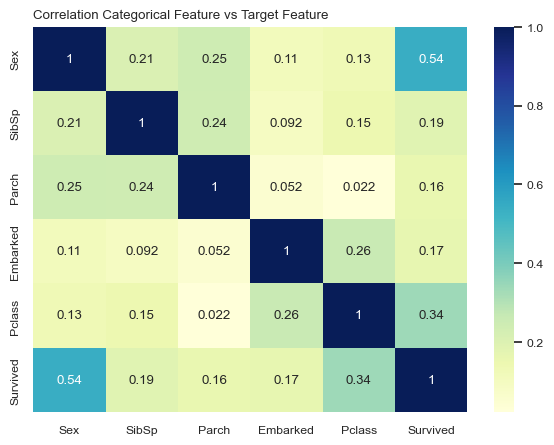

In [85]:
plt.figure(figsize=(7,5))

sns.heatmap(cat_corr, annot=True, cmap='YlGnBu')

plt.title("Correlation Categorical Feature vs Target Feature", loc='left')
plt.show()

### Correlation Numerical vs Target

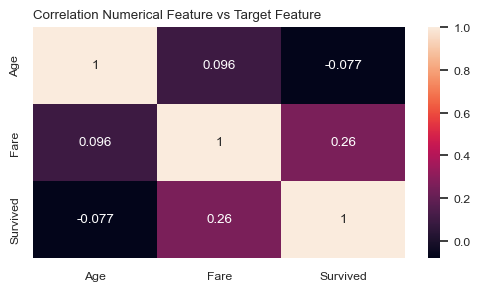

In [86]:
num_cols = ['Age', 'Fare', 'Survived']

plt.figure(figsize=(6,3))

sns.heatmap(df_train[num_cols].corr(), annot=True)

plt.title("Correlation Numerical Feature vs Target Feature", loc='left')
plt.show()

## String Feature : Name and Ticket

In [87]:
def clean_name(data):
    data = data.lower()
    data = data.strip()

    # remove non-word characters
    data = re.sub(r'[^\w\s]', '', data)
    return data

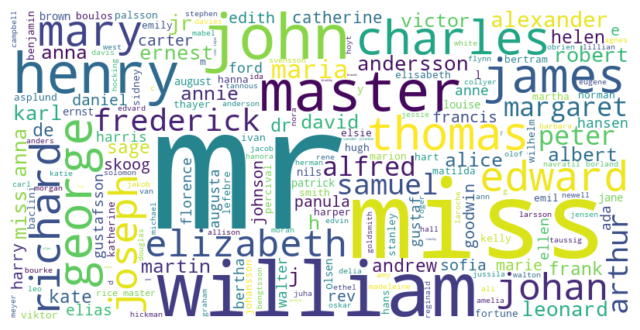

In [88]:
name = df_train['Name'].apply(clean_name)
all_name = ' '.join(name)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_name)
plt.figure(figsize=(8, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

*Number of Passanger by name title (master, miss, mr, mrs)*

In [98]:
df_train['Title'] = df_train['Name'].apply(lambda x : x.split(", ")[1].split(".")[0])
df_train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

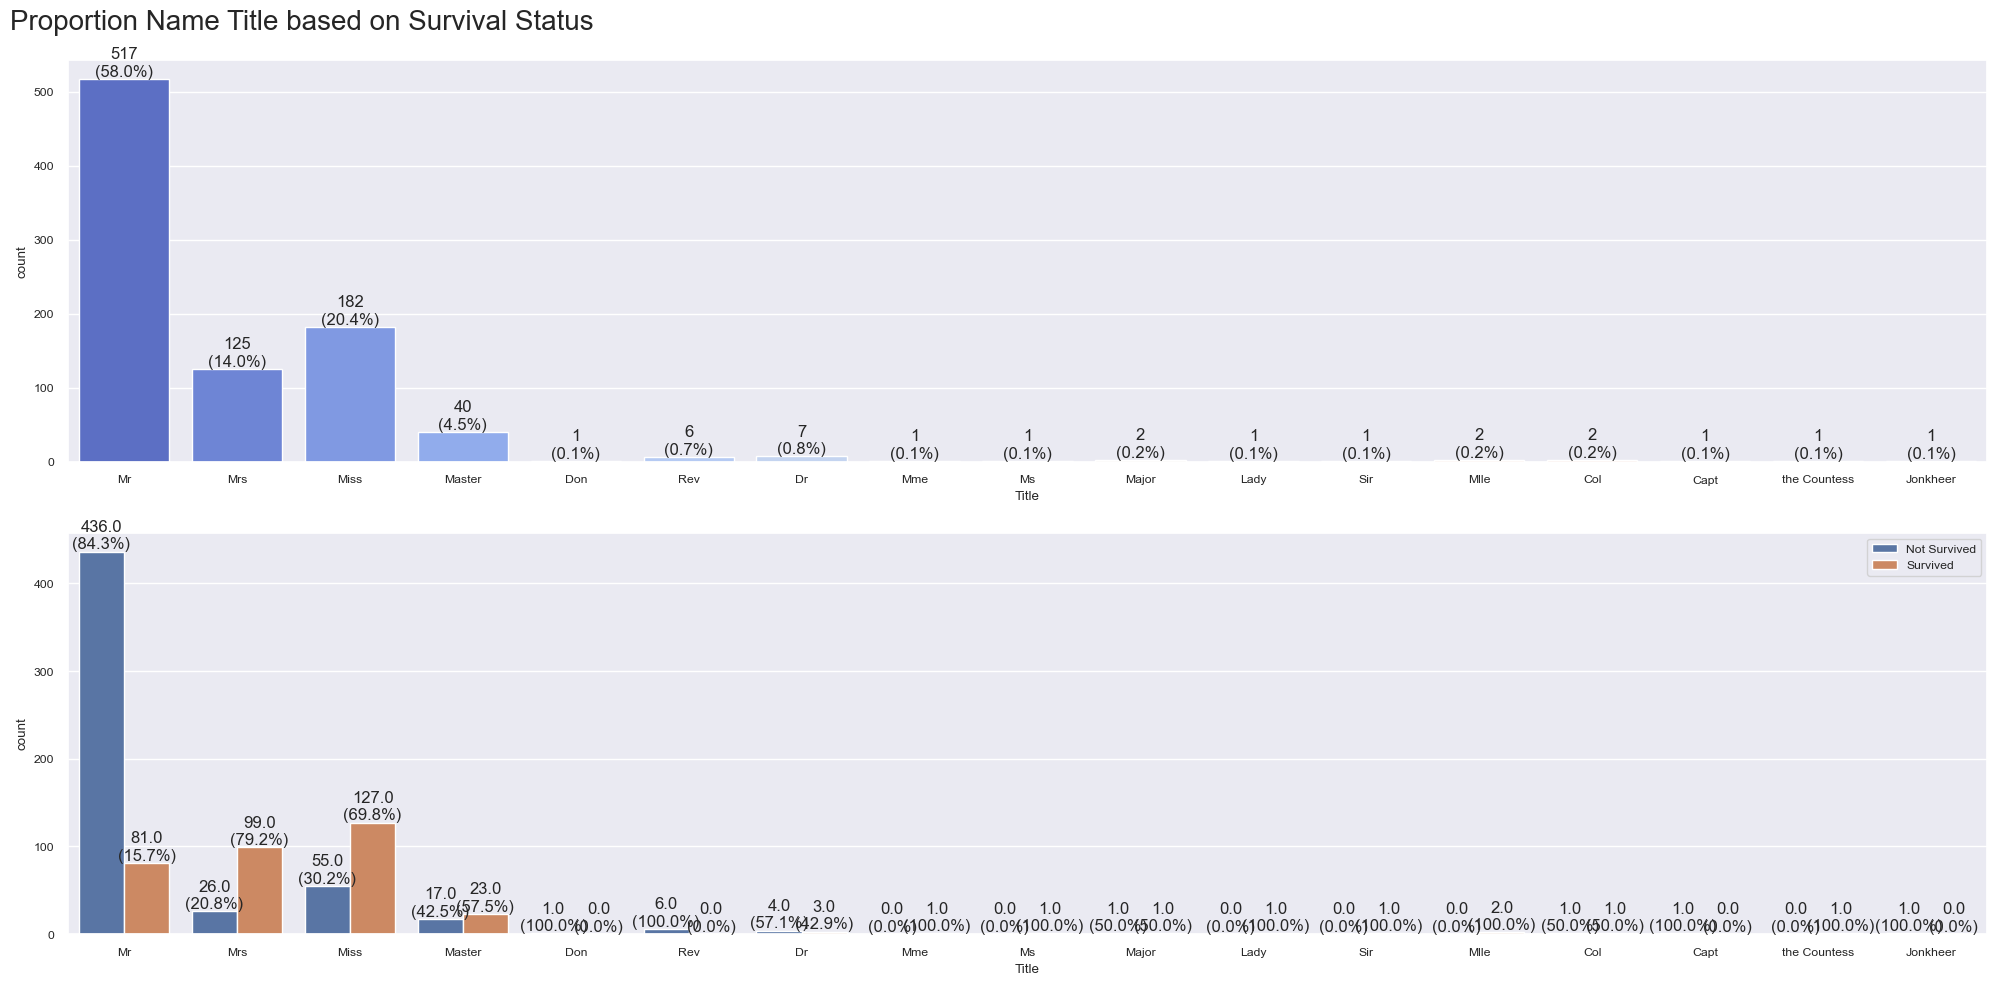

In [114]:
plt.figure(figsize=(20,10))

plt.subplot(211)
ax = sns.countplot(x='Title', data=df_train, palette = "coolwarm")
annotate_x(ax, percentage=True, size=12)

plt.subplot(212)
ax2 = sns.countplot(x='Title', hue='Survived', data=df_train)
annotate_x_group(ax2, percentage=True, size=12)
ax2.legend(['Not Survived', 'Survived'], loc='upper right')

plt.suptitle("Proportion Name Title based on Survival Status", x=0.15, size=20)
plt.tight_layout()
plt.show()

*Extract the total number of people on the trip based on unique tickets*

In [115]:
df_train['Count Ticket'] = df_train.groupby('Ticket')['PassengerId'].transform('count')

In [116]:
df_train[df_train['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CountTicket,Count Ticket
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,7,7
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,7,7
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,7,7
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,7,7
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,7,7
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,7,7
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,7,7
